# Кластеризация пользователей [DonorSearch](https://donorsearch.org/about/)

[Ссылка](https://drive.google.com/file/d/1G6akuPjBGOVOtxn96b2RRIweNo5VWS_5/view?usp=sharing) на презентацию.

**Описание проекта:** Кто-то говорит, что донорской крови не хватает, в то же время в центрах крови могут отказывать в донации из-за переизбытка крови на складе. Мы, в DonorSearch знаем, что эта проблема актуальная для всего мира. И мы знаем, как ее решить.
Мы мотивируем людей становиться донорами. С DonorSearch легче пройти путь от первой донации к регулярным и к званию Почетного донора. Но это не основная наша задача…
Кто-то говорит, что донорской крови не хватает, в то же время в центрах крови могут отказывать в донации из-за переизбытка крови на складе. Мы в DonorSearch знаем, что эта проблема актуальная для всего мира. И мы знаем, как ее решить.

**Цель исследования:** Разделить пользователей на следующие кластеры: `активный донор`, `спящий донор`, `реактивированный донор`, `потерянный`. Это поможет оценить текущее количество активных и неактивных доноров, а также отслеживать изменения в этих группах. Например, если мы видим увеличение количества реактивированных доноров, мы можем предположить, что предпринятые действия были успешными и помогли вернуть доноров к активности. Анализируя характеристики и поведение реактивированных доноров, мы сможем понять, что именно способствовало их возвращению и как можно использовать эти знания для дальнейшего повышения активности доноров.

## Описание данных

 - `ID донора` - Уникальный идентификатор донора.
 - `Подтверждённых донаций` - Количество (до и после регистрации) донаций донора, которые он подтвердил справками.
 - `Дата донации` - Дата донации.
 - `Статус донации` -  Может принимать одно из четырех значений.
 - `Готов сдавать донорские материалы` - Да или Нет. Пользователь отмечает эту информацию только на сайте.
 - `Дни с последней донации` - Сколько дней прошло с последней донации.
 - `Разница между донациями` - Сколько дней прошло между донациями.
 - `Кластер` - К какому кластеру определён донор.

## Инструкция по выполнению проекта

### Шаг 1. Загрузка данных

 - Импорт библиотек
 - Загрузка данных и вывод первых строк

### Шаг 2. Предобработка данных

 - Переименовать столбцы
 - Объединить датафреймы
 - Изменить тип данных
 - Сохранить размер исходного датафрейма
 - Проверить наличие явных дубликатов и обработать их при необходимости
 - Проверить аномалии и выбросы в данных и при необходимости обработать их
 - Удалить записи со статусом "На модерации" и "На модерации после принятия" в столбце 'Статус донации'
 - Объединить столбцы
 - Проверить, есть ли отрицательные значения
 - Проверяем на наличие пропусков
 - Посчитать оставшиеся данные в процентах после предобработки

### Шаг 3. Исследовательский анализ данных (EDA)

 - Изучить распределение количества подтверждённых донаций
 - Изучить распределение количества дней с последней донации
 - Изучить распределение готовности сдавать донорские материалы
 - Изучить распределение статусов донации
 - Изучить распределение дат донаций

### Шаг 4. Определение четких правил, как отнести пользователя к тому или иному кластеру

 - Написание правил
 - Гипотезы и предпосылки, которые привели к выделению кластеров
 - Создание функции, на основе этих правил

### Шаг 5. Создание презентации

 - Предоставить её нужно в формате pdf

## Выполнение проекта

### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns_to_load = ['ID', 'Прошедших донаций', 'Готов сдавать Цельную кровь', 'Готов сдавать Плазму',
                   'Готов сдавать Тромбоциты', 'Готов сдавать Эритроциты', 'Готов сдавать Лейкоциты',
                   'Готов сдавать Костный мозг']

users_data = pd.read_csv('F:\\Датасеты\\DonorSearch2024\\users_anon_data.csv', usecols=columns_to_load)
users_data.head(3)

,ID,Готов сдавать Цельную кровь,Готов сдавать Плазму,Готов сдавать Тромбоциты,Готов сдавать Эритроциты,Готов сдавать Лейкоциты,Готов сдавать Костный мозг,Прошедших донаций
0,300328,Да,Да,Да,Да,Да,Нет,0
1,300327,Да,Да,Да,Да,Да,Нет,0
2,300326,Да,Да,Да,Да,Да,Нет,0


In [3]:
columns_to_load = ['ID пользователя', 'Дата донации', 'Статус донации']

donations = pd.read_csv('F:\\Датасеты\\DonorSearch2024\\donations_anon.csv', usecols=columns_to_load)

donations.head(3)

,ID пользователя,Дата донации,Статус донации
0,210974,22.11.2023,На модерации
1,146460,16.08.2024,На модерации
2,292587,24.08.2024,На модерации


### Шаг 2. Предобработка данных

#### Переименовать столбцы

In [4]:
users_data = users_data.rename(columns={'ID': 'ID донора', 'Прошедших донаций': 'Подтверждённых донаций'})
donations = donations.rename(columns={'ID пользователя': 'ID донора'})

Переименовал столбцы, для большей понятности и для того, чтобы в дальнейшем можно было объединить датафреймы.

#### Объединить датафреймы

In [5]:
df = users_data.merge(donations, on='ID донора', how='left', suffixes=('_user', '_donation'))

Объединил датафреймы для большего удобства.

#### Изменить тип данных

In [6]:
df['Дата донации'] = pd.to_datetime(df['Дата донации'], format='%d.%m.%Y', errors='coerce', dayfirst=True)

Привёл тип данных в колонке `Дата донации` к формату datetime.

#### Сохранить размер исходного датафрейма

In [7]:
initial_rows = df.shape[0]

Сохранил размер исходного датафрема, чтобы в дальнейшем можно было посчитать, сколько данных осталось после предобработки.

#### Проверить наличие явных дубликатов и обработать их при необходимости

In [8]:
print(df.duplicated().sum())

44636


In [9]:
df = df.drop_duplicates()

Удалено 44636 явных дубликатов

#### Проверить аномалии и выбросы в данных и при необходимости обработать их

In [10]:
current_date = pd.to_datetime('today') # Получение текущей даты

df.loc[df['Дата донации'] > current_date, 'Дата донации'] = pd.NaT # Заменяем даты, которые позже сегодняшней даты, на NaT

Заменил даты в колонке `Дата донации` после текущей даты, на пропуски, т.к. позже этой даты события не могли произойти.

In [11]:
# Выбираем доноров с 0 подтвержденных донаций, но с указанной датой донации
condition = df[(df['Подтверждённых донаций'] == 0) & (df['Дата донации'].notna())]

# Считаем количество уникальных дат донаций для каждого донора
donation_counts = condition.groupby('ID донора')['Дата донации'].nunique()

# Заменяем количество подтвержденных донаций на количество уникальных дат донаций для соответствующих доноров
df.loc[df['ID донора'].isin(donation_counts.index) & (df['Подтверждённых донаций'] == 0), 'Подтверждённых донаций'] = \
    df['ID донора'].map(donation_counts)

У некоторых доноров были указаны даты донации, но количество подтверждённых донаций было 0. Были посчитаны даты донаций и заменены нули на реальное количество донаций.

In [12]:
# Фильтрация данных для вывода пользователей с подтвержденными донациями и пропусками в дате донации
confirmed_donations_missing_date = df[(df['Подтверждённых донаций'] > 0) & (df['Дата донации'].isna())]

len(confirmed_donations_missing_date) # выясняем сколько таких строк

22

Есть 22 строки, в которых дата донации не указана, но есть подтверждённые донации.

In [13]:
df = df[~((df['Подтверждённых донаций'] > 0) & (df['Дата донации'].isna()))]

Удалены пользователи с подтвержденными донациями и пропусками в дате донации

#### Удалить записи с лишними статусами в столбце 'Статус донации'

In [14]:
df = df[~df['Статус донации'].isin(['На модерации', 'На модерации после принятия', 'Удалена', 'Отклонена'])]

Удалены записи со статусами `На модерации`, `На модерации после принятия`, `Удалена`, `Отклонена` в столбце `Статус донации`, т.к. по словам заказчика их не стоит рассматривать.

#### Объединить столбцы

In [15]:
cols = ['Готов сдавать Цельную кровь', 'Готов сдавать Плазму', 'Готов сдавать Тромбоциты',
        'Готов сдавать Эритроциты', 'Готов сдавать Лейкоциты', 'Готов сдавать Костный мозг']

df['Готов сдавать донорские материалы'] = df[cols].apply(lambda row: 'Да' if 'Да' in row.values else 'Нет', axis=1)

df = df.drop(columns=cols) # Удаление старых колонок

Объединены столбцы `Готов сдавать Цельную кровь`, `Готов сдавать Плазму`, `Готов сдавать Тромбоциты`, `Готов сдавать Эритроциты`, `Готов сдавать Лейкоциты`, `Готов сдавать Костный мозг` в виде одного столбца `Готов сдавать донорские материалы`, т.к. необходима общая информация, а не по каждому донорскому материалу в отдельности.

#### Проверить, есть ли отрицательные значения

In [16]:
# Проверка на наличие отрицательных значений в датафрейме df
negative_values = (df.select_dtypes(include=['int64', 'float64']) < 0).any().any()

if negative_values:
    print("В датафрейме есть отрицательные значения.")
else:
    print("В датафрейме нет отрицательных значений.")

В датафрейме нет отрицательных значений.


#### Проверяем на наличие пропусков

In [17]:
def check_missing_values(df, df_name):
    """
    Функция для подсчета и отображения пропущенных значений в столбцах датафрейма.
    """
    # Подсчет пропусков по колонкам
    report = df.isna().sum()

    # Фильтрация только колонок с пропусками
    report = report[report > 0].to_frame(name='missing_values')

    # Проверка наличия пропусков и создание отчета
    if not report.empty:
        # Добавление столбца с процентами пропусков
        report['% of total'] = (report['missing_values'] / df.shape[0]).round(3) * 100
        report = report.sort_values(by='missing_values', ascending=False)
        display(report)
    else:
        print(f"Пропусков в таблице {df_name} нет.")

check_missing_values(df, 'df')

,missing_values,% of total
Дата донации,233738,43.5
Статус донации,233738,43.5


Пропуски есть только в столбцах `Дата донации` и `Статус донации`. Удалять их нельзя, т.к. иначе мы потеряем значительную часть данных.

#### Посчитать оставшиеся данные в процентах после предобработки

In [18]:
percentage_remaining = (df.shape[0] / initial_rows) * 100

print(f"Процент оставшихся данных после предобработки: {percentage_remaining:.2f}%")

Процент оставшихся данных после предобработки: 90.97%


**Промежуточные выводы:**

 - Объединил датафреймы для большего удобства.
 - Привёл тип данных в колонке `Дата донации` к формату datetime.
 - Сохранил размер исходного датафрема, чтобы в дальнейшем можно было посчитать, сколько данных осталось после предобработки.
 - Удалено 44636 явных дубликатов
 - Заменил даты в колонке `Дата донации` после текущей даты, на пропуски, т.к. позже этой даты события не могли произойти.
 - У некоторых доноров были указаны даты донации, но количество подтверждённых донаций было 0. Были посчитаны даты донаций и заменены нули на реальное количество донаций.
 - Было 22 строки, в которых дата донации не указана, но есть подтверждённые донации. Удалены пользователи с подтвержденными донациями и пропусками в дате донации.
 - Удалены записи со статусами `На модерации`, `На модерации после принятия`, `Удалена`, `Отклонена` в столбце `Статус донации`, т.к. по словам заказчика их не стоит рассматривать.
 - Объединены столбцы `Готов сдавать Цельную кровь`, `Готов сдавать Плазму`, `Готов сдавать Тромбоциты`, `Готов сдавать Эритроциты`, `Готов сдавать Лейкоциты`, `Готов сдавать Костный мозг` в виде одного столбца `Готов сдавать донорские материалы`, т.к. необходима общая информация, а не по каждому донорскому материалу в отдельности.
 - В датафрейме нет отрицательных значений.
 - Пропуски есть только в столбцах `Дата донации` и `Статус донации`. Удалять их нельзя, т.к. иначе мы потеряем значительную часть данных.
 - Процент оставшихся данных после предобработки: 90.97%

### Шаг 3. Исследовательский анализ данных (EDA)

#### Изучить распределение количества подтверждённых донаций на одного донора

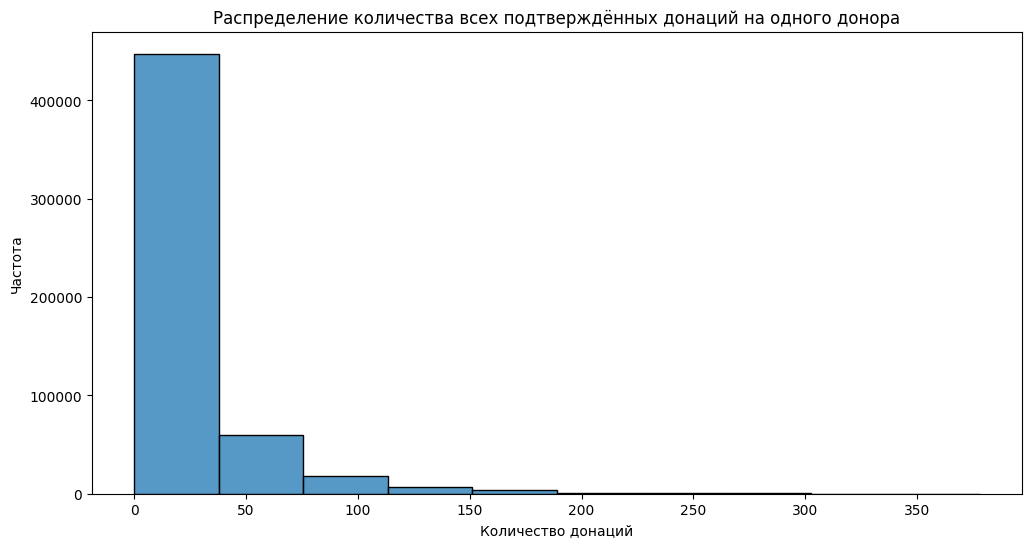

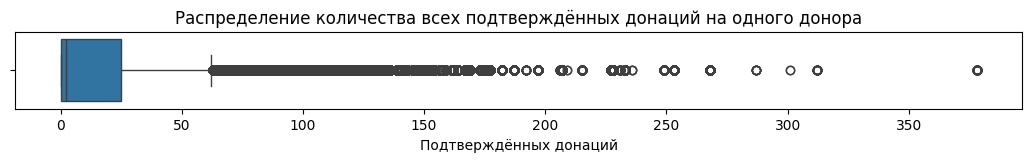

In [19]:
# Построение графика распределения количества донаций
plt.figure(figsize=(12, 6))
sns.histplot(df['Подтверждённых донаций'].dropna(), kde=False, bins=10)
plt.title('Распределение количества всех подтверждённых донаций на одного донора')
plt.xlabel('Количество донаций')
plt.ylabel('Частота')
plt.show()

# Пример для количества подтвержденных донаций
plt.figure(figsize=(13, 1))
sns.boxplot(x=df['Подтверждённых донаций'])
plt.title('Распределение количества всех подтверждённых донаций на одного донора')
plt.show()

Большинство доноров имеют до 30 подтвержденных донаций. Это распределение показывает, сколько подтвержденных донаций приходится на одного донора.

#### Изучить распределение количества дней с последней донации

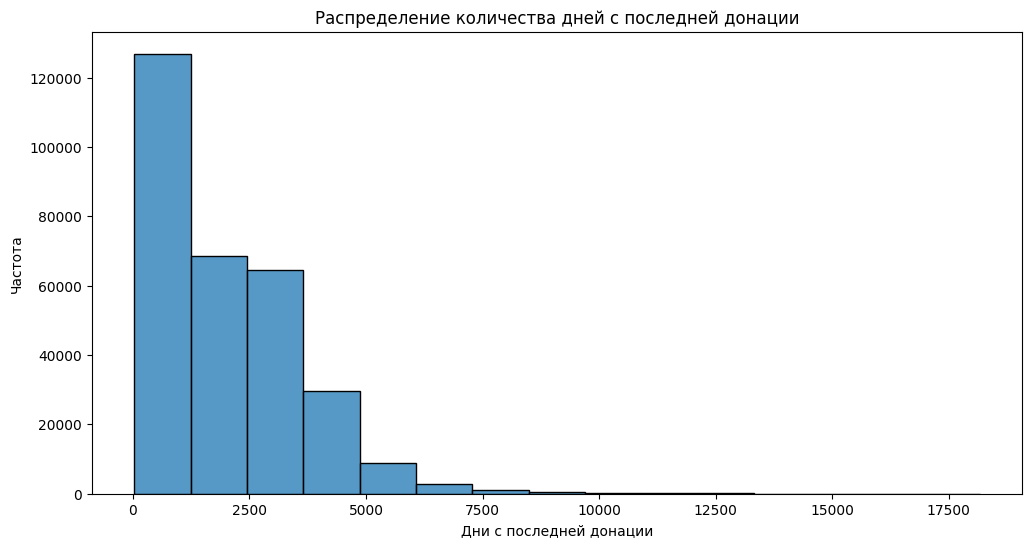

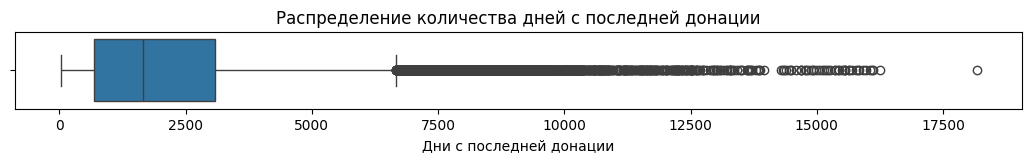

In [20]:
# Вычисление количества дней с последней донации
df['Дни с последней донации'] = (pd.to_datetime('today') - df['Дата донации']).dt.days

# Построение графика распределения количества донаций
plt.figure(figsize=(12, 6))

sns.histplot(df['Дни с последней донации'].dropna(), kde=False, bins=15)
plt.title('Распределение количества дней с последней донации')
plt.xlabel('Дни с последней донации')
plt.ylabel('Частота')

plt.show()

# Пример для количества подтвержденных донаций
plt.figure(figsize=(13, 1))
sns.boxplot(x=df['Дни с последней донации'])
plt.title('Распределение количества дней с последней донации')
plt.show()

In [21]:
print(df['Дата донации'].min())
print(df['Дата донации'].max())

1975-01-01 00:00:00
2024-08-25 00:00:00


У большинства доноров, не более 13 лет с последней донации, учитывая, что мы располагаем данными с 1975 года.

#### Изучить распределение готовности сдавать донорские материалы

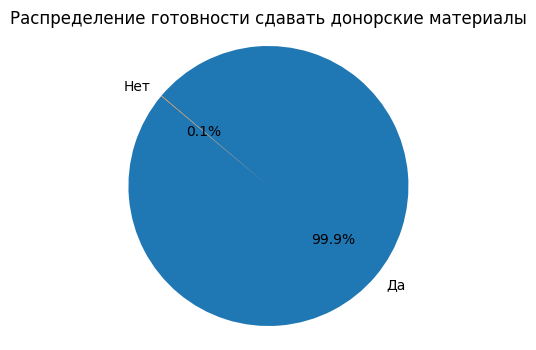

In [22]:
ready_to_donate_counts = df['Готов сдавать донорские материалы'].value_counts()

# Круговая диаграмма
plt.figure(figsize=(6, 4))
plt.pie(ready_to_donate_counts, labels=ready_to_donate_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение готовности сдавать донорские материалы')
plt.axis('equal')
plt.show()

99.9% готовы сдавать донорские материалы, и только 0.1% не готов.

#### Изучить распределение статусов донации

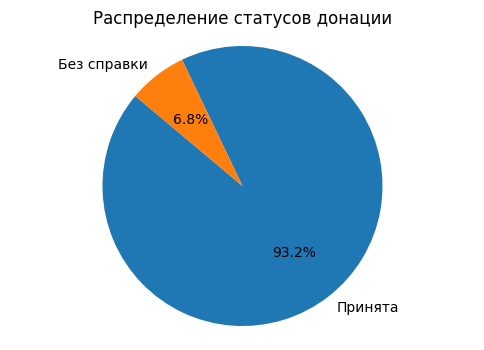

In [23]:
status_donat = df['Статус донации'].value_counts()

# Круговая диаграмма
plt.figure(figsize=(6, 4))
plt.pie(status_donat, labels=status_donat.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение статусов донации')
plt.axis('equal')
plt.show()

У 93.2% доноров справка принята, и только 6.8% доноров без справки.

#### Распределение дат донаций

In [24]:
len(df['Дата донации'])

537267

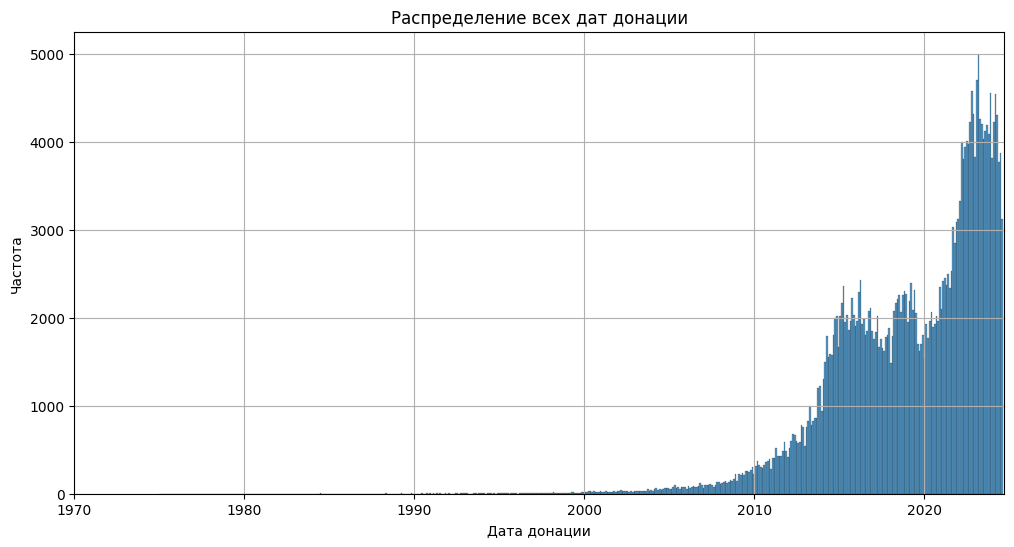

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Дата донации'].dropna(), bins=500)
plt.title('Распределение всех дат донации')
plt.xlabel('Дата донации')
plt.ylabel('Частота')
plt.grid(True)
plt.xlim(0, current_date)
plt.show()

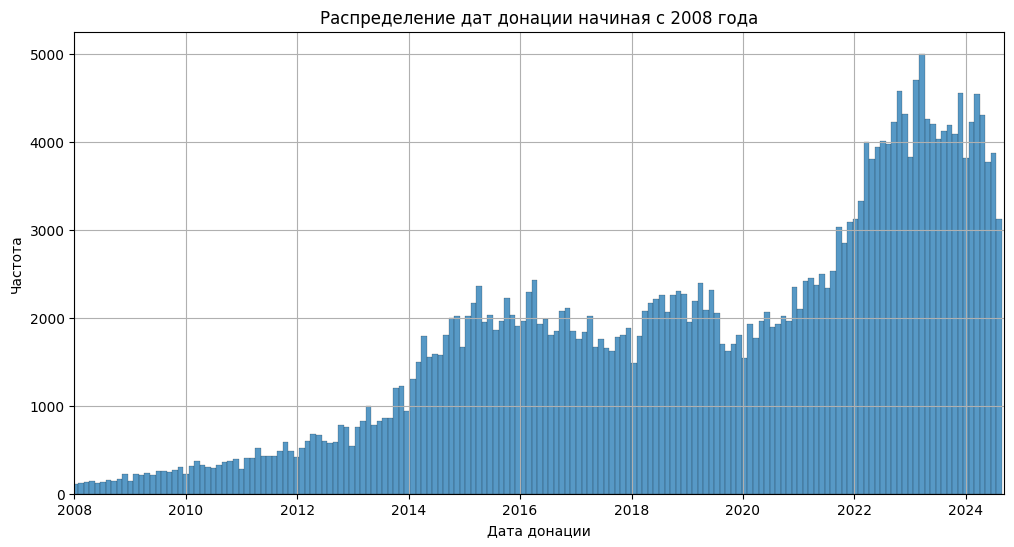

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Дата донации'].dropna(), bins=500)
plt.title('Распределение дат донации начиная с 2008 года')
plt.xlabel('Дата донации')
plt.ylabel('Частота')
plt.grid(True)
plt.xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2024-09-10'))
plt.show()

С 1975 до 2008 наблюдается незначительное количество донаций. И только с 2008 по 2024 пошёл их значительный рост.

**Промежуточные выводы:**

 - Большинство доноров имеют до 30 подтвержденных донаций. Это распределение показывает, сколько подтвержденных донаций приходится на одного донора.

 - У большинства доноров, не более 13 лет с последней донации, учитывая, что мы располагаем данными с 1975 года.

 - 99.9% готовы сдавать донорские материалы, и только 0.1% не готов.

 - У 93.2% доноров справка принята, и только 6.8% доноров без справки.

 - С 1975 до 2008 наблюдается незначительное количество донаций. И только с 2008 по 2024 пошёл их значительный рост.

### Шаг 4. Определение четких правил, как отнести пользователя к тому или иному кластеру

#### Написание правил

 - **Потерянный донор**: Если пользователь не готов сдавать донорские материалы, то он классифицируется как "потерянный".

 - **Реактивированный донор**: Если пользователь готов сдавать донорские материалы, имеет 2 или более подтверждённых донаций, разница между последними двумя донациями составляет более 24 месяцев, и количество дней с последней донации составляет не более 6 месяцев, то он классифицируется как "реактивированный".

 - **Активный донор**: Если пользователь готов сдавать донорские материалы, имеет 2 или более подтверждённых донаций, и количество дней с последней донации составляет не более 6 месяцев, то он классифицируется как "активный".

 - **Спящий донор**: Если пользователь готов сдавать донорские материалы, но имеет только одну или меньше подтверждённых донаций **или** количество дней с последней донации составляет более 6 месяцев, то он классифицируется как "спящий".

#### Гипотезы и предпосылки, которые привели к выделению кластеров

Для выделения каждого из кластеров доноров были сформулированы гипотезы и предпосылки, основанные на логике поведения доноров и их активности. Ниже приведены гипотезы и причины, по которым доноры были отнесены в определённый кластер:

**Потерянный донор**

 - **Гипотеза:** Доноры, которые не готовы больше сдавать донорские материалы, не проявляют интерес к донациям и, вероятно, прекратили свою донорскую деятельность навсегда.
 - **Предпосылка:** Если донор указал, что больше не готов сдавать донорские материалы, это означает, что он не планирует возвращаться к донациям в обозримом будущем, что делает его потерянным для организации. Независимо от количества предыдущих донаций, такие доноры не проявляют готовности к повторным донациям.

**Реактивированный донор**

 - **Гипотеза:** Реактивированные доноры — это доноры, которые ранее проявляли активность, затем сделали длительный перерыв (более двух лет) и вновь вернулись к донорской деятельности.
 - **Предпосылка:** Доноры, которые после длительного перерыва (более 24 месяцев) вновь начали сдавать кровь и при этом готовы продолжать, могут считаться реактивированными. Эта группа доноров важна для организации, так как они уже имели опыт донаций и могут быть привлечены к регулярной сдаче крови. Условия для классификации включают наличие как минимум двух донаций и отсутствие перерыва более 6 месяцев с последней донации.

**Активный донор**

 - **Гипотеза:** Активные доноры регулярно сдают донорские материалы и продолжают поддерживать свою готовность к донациям в ближайшем будущем.
 - **Предпосылка:** Доноры, которые готовы сдавать донорские материалы и уже имеют не менее двух донаций, при этом не делая перерыва более 6 месяцев с момента последней донации, считаются активными. Эта группа доноров — самая ценная для донорской организации, так как они постоянно участвуют в донациях и могут поддерживать запасы донорских материалов на должном уровне.

**Спящий донор**

 - **Гипотеза:** Спящие доноры — это доноры, которые сдали кровь один раз или давно не принимали участия в донациях, но остаются потенциально активными и готовы возобновить донации в будущем.
 - **Предпосылка:** Если донор готов сдавать донорские материалы, но имеет только одну донацию или не сдавал кровь уже более 6 месяцев, он классифицируется как спящий. Эта группа доноров нуждается в дополнительной мотивации и может быть активирована с помощью специальных кампаний или напоминаний. Спящие доноры, по сути, находятся в «зоне риска» потерять интерес к донациям, поэтому важно с ними работать для их повторной активации.

Эти гипотезы и предпосылки основаны на изучении данных, поведении доноров и их потенциальной активности в будущем, что позволяет оптимально распределить доноров по кластерам для дальнейшей работы с каждой группой.

#### Создание функции, на основе этих правил

In [27]:
# Сортировка данных по ID донора и Дате донации
df = df.sort_values(by=['ID донора', 'Дата донации'])

# Вычисление разницы в днях между донациями для каждого донора
df['Разница между донациями'] = df.groupby('ID донора')['Дата донации'].diff().dt.days

def classify_donor(row):
    # Потерянный донор
    if row['Готов сдавать донорские материалы'] == 'Нет':
        return 'потерянный'
    # Реактивированный донор
    elif (
        row['Готов сдавать донорские материалы'] == 'Да' 
        and row['Подтверждённых донаций'] >= 2 
        and row['Разница между донациями'] > 24 * 30 
        and row['Дни с последней донации'] <= 6 * 30
    ):
        return 'реактивированный'
    # Активный донор
    elif (
        row['Готов сдавать донорские материалы'] == 'Да' 
        and row['Подтверждённых донаций'] >= 2 
        and row['Дни с последней донации'] <= 6 * 30
    ):
        return 'активный'
    # Спящий донор (нет донаций или только одна донация)
    elif (
        row['Готов сдавать донорские материалы'] == 'Да' 
        and (row['Подтверждённых донаций'] <= 1 or row['Дни с последней донации'] > 6 * 30)
    ):
        return 'спящий'
    else:
        return None

# Применение функции кластеризации к датафрейму
df['Кластер'] = df.apply(classify_donor, axis=1)

# Проверка результата
print(df['Кластер'].value_counts())

# Вывод доноров, не попавших в кластеры
not_classified = df[df['Кластер'].isna()]
print(f"Количество доноров, не попавших в кластеры: {not_classified.shape[0]}")
print("Примеры данных доноров, не попавших в кластеры:")
print(not_classified.head())

Кластер
спящий              522666
активный             14009
потерянный             300
реактивированный       292
Name: count, dtype: int64
Количество доноров, не попавших в кластеры: 0
Примеры данных доноров, не попавших в кластеры:
Empty DataFrame
Columns: [ID донора, Подтверждённых донаций, Дата донации, Статус донации, Готов сдавать донорские материалы, Дни с последней донации, Разница между донациями, Кластер]
Index: []


По итогу была создана функция, которая разделила всех доноров на выбранные кластеры. Доноров, которые не попали в выбранные кластеры, не оказалось.

### 5. Выводы по работе 

#### Шаг 1. Загрузка данных

Были загружены 2 датасета, `users_anon_data` и `donations_anon`.

#### Шаг 2. Предобработка данных

 - Объединил датафреймы для большего удобства.
 - Привёл тип данных в колонке `Дата донации` к формату datetime.
 - Сохранил размер исходного датафрема, чтобы в дальнейшем можно было посчитать, сколько данных осталось после предобработки.
 - Удалено 44636 явных дубликатов
 - Заменил даты в колонке `Дата донации` после текущей даты, на пропуски, т.к. позже этой даты события не могли произойти.
 - У некоторых доноров были указаны даты донации, но количество подтверждённых донаций было 0. Были посчитаны даты донаций и заменены нули на реальное количество донаций.
 - Было 22 строки, в которых дата донации не указана, но есть подтверждённые донации. Удалены пользователи с подтвержденными донациями и пропусками в дате донации.
 - Удалены записи со статусами `На модерации`, `На модерации после принятия`, `Удалена`, `Отклонена` в столбце `Статус донации`, т.к. по словам заказчика их не стоит рассматривать.
 - Объединены столбцы `Готов сдавать Цельную кровь`, `Готов сдавать Плазму`, `Готов сдавать Тромбоциты`, `Готов сдавать Эритроциты`, `Готов сдавать Лейкоциты`, `Готов сдавать Костный мозг` в виде одного столбца `Готов сдавать донорские материалы`, т.к. необходима общая информация, а не по каждому донорскому материалу в отдельности.
 - В датафрейме нет отрицательных значений.
 - Пропуски есть только в столбцах `Дата донации` и `Статус донации`. Удалять их нельзя, т.к. иначе мы потеряем значительную часть данных.
 - Процент оставшихся данных после предобработки: 90.97%
 
#### Шаг 3. Исследовательский анализ данных (EDA)

 - Большинство доноров имеют до 30 подтвержденных донаций. Это распределение показывает, сколько подтвержденных донаций приходится на одного донора.

 - У большинства доноров, не более 13 лет с последней донации, учитывая, что мы располагаем данными с 1975 года.

 - 99.9% готовы сдавать донорские материалы, и только 0.1% не готов.

 - У 93.2% доноров справка принята, и только 6.8% доноров без справки.

 - С 1975 до 2008 наблюдается незначительное количество донаций. И только с 2008 по 2024 пошёл их значительный рост.
 
#### Шаг 4. Определение четких правил, как отнести пользователя к тому или иному кластеру

Были описаны правила, как отнести пользователя к тому или иному кластеру, гипотезы и предпосылки, которые привели к выделению кластеров, и написана сама функция, которая распределяет доноров на выбранные кластеры.

#### Рекомендации:

 - **Улучшение данных:** Провести дополнительную проверку данных на наличие аномалий, особенно в датах донаций и статусах доноров.
 - **Мониторинг активности:** Вести регулярный анализ активных и реактивированных доноров для увеличения вовлеченности.
 - **Работа с потерянными донорами:** Разработать кампании по возвращению доноров, которые не готовы сдавать материалы или давно не делали донаций.

#### Итоговый вывод:

Проект успешно классифицировал доноров на активных, спящих, реактивированных и потерянных на основе четких правил. Основные кластеры позволяют лучше понимать поведение доноров и планировать стратегии взаимодействия.